In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz

np.random.seed(3487)

In [2]:
def plot_tree_model(model,feature_names):
    dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=feature_names,  
                      impurity=False,label = 'none',
#                       class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True)  
    graph = graphviz.Source(dot_data)
    graph.render(format="png", filename="iris_tree")
    return graph

In [3]:
iris_data = pd.read_csv("iris.csv")
feature_names = ["petal_length", "petal_width","sepal_length", "sepal_width"]

root_feature_count = { name:0  for name in feature_names}
for i in range(100):
    iris_train = iris_data.sample(150,replace=True)
    Xtrain = iris_train[feature_names]
    ytrain = iris_train["species"]
    model = tree.DecisionTreeClassifier().fit(Xtrain, ytrain)
    root_feature = feature_names[model.tree_.feature[0]]
    root_feature_count[root_feature] = root_feature_count[root_feature] + 1

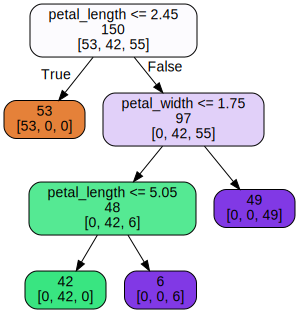

In [4]:
plot_tree_model(model,feature_names)

<BarContainer object of 4 artists>

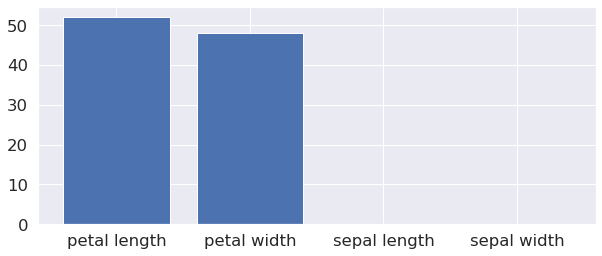

In [5]:
mydict = {'petal length': root_feature_count['petal_length'], 
          'petal width': root_feature_count['petal_width'], 
          'sepal length': root_feature_count['sepal_length'], 
          'sepal width': root_feature_count['sepal_width']}

plt.figure(figsize=(10,4))
plt.bar(mydict.keys(),mydict.values())

SyntaxError: invalid syntax (519461130.py, line 1)

# Feature importance

array([0.62626964, 0.37373036, 0.        , 0.        ])

# Plot trees from a random forest

<BarContainer object of 4 artists>

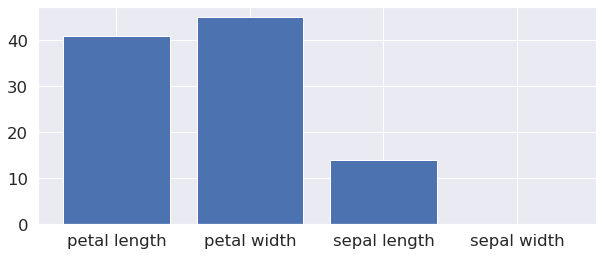

In [14]:
iris = load_iris()
model = RandomForestClassifier(n_estimators=100, max_features=2)
model.fit(iris.data, iris.target)

root_feature_count = { name:0  for name in iris.feature_names}
for estimator in model.estimators_:
    root_feature = iris.feature_names[estimator.tree_.feature[0]]
    root_feature_count[root_feature] = root_feature_count[root_feature] + 1
    
mydict = {'petal length': root_feature_count['petal length (cm)'], 
          'petal width': root_feature_count['petal width (cm)'], 
          'sepal length': root_feature_count['sepal length (cm)'], 
          'sepal width': root_feature_count['sepal width (cm)']}

plt.figure(figsize=(10,4))
plt.bar(mydict.keys(),mydict.values())

<BarContainer object of 4 artists>

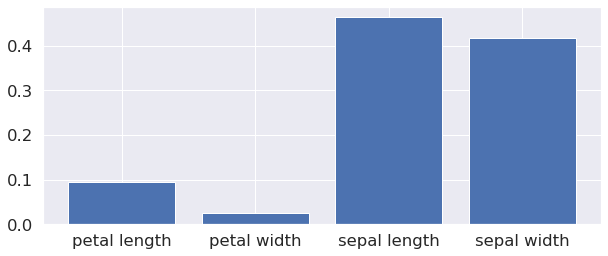

In [13]:


mydict = {'petal length': model.feature_importances_[0], 
          'petal width': model.feature_importances_[1], 
          'sepal length': model.feature_importances_[2], 
          'sepal width': model.feature_importances_[3] }

plt.figure(figsize=(10,4))
plt.bar(mydict.keys(),mydict.values())

In [ ]:
# plot_tree_model(model.estimators_[34],iris.feature_names)

# Random forest performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
num_trees_list = np.arange(20,200,5)
max_features_list = [1,2,3,4]
scores = np.empty((len(max_features_list),len(num_trees_list)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( iris.data,  iris.target, test_size=0.3)

In [ ]:
for f, max_features in enumerate(max_features_list): 
    for t, numtrees in enumerate(num_trees_list):
        model = RandomForestClassifier(n_estimators=numtrees,max_features=max_features)
        model = model.fit(X_train,y_train) 
        y_pred = model.predict(X_test)
        scores[f,t] = accuracy_score(y_test,y_pred)

In [ ]:
scores.mean(axis=1)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="iris_tree")
graph

In [ ]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')